**Overview of the Work**

This notebook aims to build a Machine Learning model that predicts whether a mushroom is edible (e) or poisonous (p) based on its attributes. We follow a structured workflow to prepare, process, train, and evaluate a neural network model using both original and PCA-transformed data.
Step-by-Step Breakdown of the Process

_1. Data Loading and Preprocessing_

    We import the mushroom dataset (agaricus-lepiota.csv) into a Pandas DataFrame. The first column represents the target variable (e for edible, p for poisonous). The remaining columns contain categorical features describing different properties of mushrooms (e.g., cap shape, color, odor, stalk shape, etc.). We assign proper column names using the attribute information provided.

&nbsp;

_2. Splitting the Data (Train-Test Split)_

    We split the dataset into 80% training data and 20% testing data to ensure we have enough data to train and evaluate the model. The split maintains the original data distribution, ensuring fair model evaluation.

&nbsp;

_3. Encoding the Data_

Since the dataset contains categorical values, we convert them into numerical values:

    One-Hot Encoding (OHE) for Features
        Each categorical feature is transformed into binary columns (e.g., cap-shape_x, cap-shape_f, etc.).
        This results in a significant increase in the number of features.

    Label Encoding for the Target Variable
        e (edible) → 0
        p (poisonous) → 1
        This is necessary because neural networks require numerical labels.

&nbsp;

_4. Building the First Neural Network (Using One-Hot Encoded Data)_

    We define a Sequential Neural Network with:
        Input Layer: Matches the number of one-hot encoded features.
        Hidden Layer: 16 neurons with ReLU activation.
        Output Layer: 1 neuron with sigmoid activation for binary classification.

    Compilation & Training
        Loss function: binary_crossentropy (since it’s a binary classification task).
        Optimizer: adam (efficient gradient-based optimization).
        Metric: accuracy.

    We train the model on the One-Hot Encoded data and time the training process to compare it later with the PCA model.

&nbsp;

_5. Evaluating the First Model (One-Hot Encoded Data)_

    We predict on the test set and convert probabilities into class labels (0 or 1). We compute a confusion matrix to analyze classification performance. The ConfusionMatrixDisplay helps visualize true positives, false positives, true negatives, and false negatives.

&nbsp;

_6. Applying PCA for Dimensionality Reduction_

    PCA (Principal Component Analysis) is applied to reduce feature dimensions while retaining 95% of the variance.
    This helps:
        Reduce the complexity of the model.
        Improve efficiency by decreasing the number of parameters.
        Minimize overfitting risks.

&nbsp;

_7. Building and Training a New Neural Network (Using PCA Data)_

    Since PCA reduces the number of features, the input layer must be adjusted accordingly.
    The new model follows the same architecture:
        16 hidden units with ReLU activation.
        1 output unit with sigmoid activation.
    We train this PCA-based model and record its training time.

&nbsp;

_8. Evaluating the PCA Model_

    Predictions are made using the PCA-transformed test set.
    A Confusion Matrix is computed and visualized to compare the PCA-based model’s performance against the original model.

&nbsp;

_9. Comparing Both Models_

    We analyze key differences:
    - Feature Size Reduction: PCA reduces the number of input features significantly.
    - Training Time: The PCA model trains faster due to fewer input dimensions.
    - Performance Comparison: If the accuracy is maintained or improves with PCA, then dimensionality reduction is beneficial.

&nbsp;

_10. Exporting the PCA Model_

    We save the trained PCA-based neural network (.h5 format) so it can be reused without retraining.
    The model is loaded back to verify its correctness.

***

_1. Data Loading and Preprocessing_

In [1]:
import pandas as pd

# Define the column names based on the attribute information
columns = [
    "class",  # Target column: edible (e) or poisonous (p)
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises?",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

# Load the dataset and assign column names
data = pd.read_csv("agaricus-lepiota.csv", header=None, names=columns)

# Display the first few rows of the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
from sklearn.model_selection import train_test_split

# Split the features and target variable
x = data.drop("class", axis=1)  # Features (all columns except the target)
y = data["class"]              # Target (the 'class' column)

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (6499, 22)
Training Target Shape: (6499,)
Testing Features Shape: (1625, 22)
Testing Target Shape: (1625,)


In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encode the features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Create the encoder
X_train_encoded = onehot_encoder.fit_transform(X_train)               # Fit and transform the training features
X_test_encoded = onehot_encoder.transform(X_test)                     # Transform the testing features

# Label Encode the responses
label_encoder = LabelEncoder()                   # Create the encoder
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform the training target
y_test_encoded = label_encoder.transform(y_test)        # Transform the testing target


# Display the shapes of encoded data
print("Encoded Training Features Shape:", X_train_encoded.shape)
print("Encoded Testing Features Shape:", X_test_encoded.shape)
print("Encoded Training Target Shape:", y_train_encoded.shape)
print("Encoded Testing Target Shape:", y_test_encoded.shape)

Encoded Training Features Shape: (6499, 116)
Encoded Testing Features Shape: (1625, 116)
Encoded Training Target Shape: (6499,)
Encoded Testing Target Shape: (1625,)


c:\Users\Daksh\anaconda3\envs\DTSC680\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input dimension (number of features in the encoded data)
input_dim = X_train_encoded.shape[1]

# Create the sequential model
model = Sequential()

# Input layer with ReLU activation
model.add(Dense(units=16, activation='relu', input_dim=input_dim))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and an optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1872      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [5]:
%%time

# Train the model using the training data
history = model.fit(X_train_encoded, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_encoded, y_test_encoded))

Epoch 1/20
204/204 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.9001 - val_loss: 0.0967 - val_accuracy: 0.9791
Epoch 2/20
204/204 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9895 - val_loss: 0.0364 - val_accuracy: 0.9945
Epoch 3/20
204/204 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9968 - val_loss: 0.0186 - val_accuracy: 0.9963
Epoch 4/20
204/204 [==============================] - 0s 989us/step - loss: 0.0123 - accuracy: 0.9988 - val_loss: 0.0110 - val_accuracy: 0.9975
Epoch 5/20
204/204 [==============================] - 0s 957us/step - loss: 0.0073 - accuracy: 0.9997 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 6/20
204/204 [==============================] - 0s 959us/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0052 - val_accuracy: 0.9988
Epoch 7/20
204/204 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9994


51/51 [==============================] - 0s 523us/step


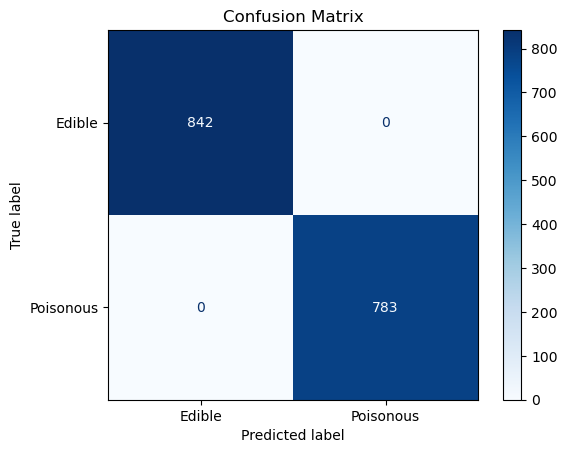

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set using the trained model
y_pred = (model.predict(X_test_encoded) > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Performing PCA:**
- Performing PCA will reduce the number of features the model needs to train on

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Apply PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the new shape of the training data after PCA
print(f"Original feature count: {X_train_encoded.shape[1]}")
print(f"Reduced feature count after PCA: {X_train_pca.shape[1]}")


Original feature count: 116
Reduced feature count after PCA: 60


**Creating a new Neural Network**

In [8]:
# Define the input dimension (number of PCA components)
input_dim_pca = X_train_pca.shape[1]

# Create a new sequential model for PCA data
pca_model = Sequential()

# Input layer with ReLU activation
pca_model.add(Dense(units=16, activation='relu', input_dim=input_dim_pca))

# Output layer with sigmoid activation for binary classification
pca_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

pca_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                976       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


**Training the PCA Model**

In [9]:
%%time 

# Train the model using the PCA-transformed data
history_pca = pca_model.fit(X_train_pca, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test_encoded))

Epoch 1/20
204/204 [==============================] - 1s 1ms/step - loss: 0.2273 - accuracy: 0.9391 - val_loss: 0.1059 - val_accuracy: 0.9895
Epoch 2/20
204/204 [==============================] - 0s 994us/step - loss: 0.0532 - accuracy: 0.9958 - val_loss: 0.0375 - val_accuracy: 0.9963
Epoch 3/20
204/204 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9989 - val_loss: 0.0160 - val_accuracy: 0.9988
Epoch 4/20
204/204 [==============================] - 0s 935us/step - loss: 0.0114 - accuracy: 0.9998 - val_loss: 0.0112 - val_accuracy: 0.9988
Epoch 5/20
204/204 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9998 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 6/20
204/204 [==============================] - 0s 952us/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0071 - val_accuracy: 0.9988
Epoch 7/20
204/204 [==============================] - 0s 920us/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 0.998

51/51 [==============================] - 0s 523us/step


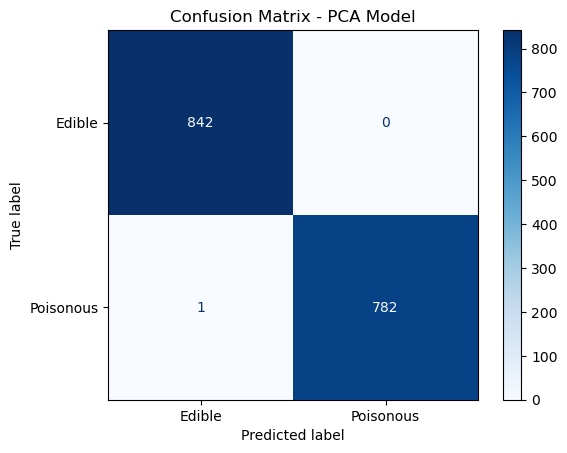

In [10]:
# Predict on the PCA-transformed test set
y_pred_pca = (pca_model.predict(X_test_pca) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Compute the confusion matrix
cm_pca = confusion_matrix(y_test_encoded, y_pred_pca)

# Display the confusion matrix
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=['Edible', 'Poisonous'])
disp_pca.plot(cmap=plt.cm.Blues)

# Set title and show plot
plt.title("Confusion Matrix - PCA Model")
plt.show()

***
**Concept Questions and Answers**

**1. How many features does the data have after the One-Hot Encoding? How does this compare to the number of features that the data had before the encoding?**
- Before One-Hot Encoding, the dataset had 22 categorical features (excluding the target column). After One-Hot Encoding, the dataset expanded to more than 100 features because each categorical feature was replaced by multiple binary columns (one for each category).

&nbsp;

**2. What should the units parameter of the output layer in the network be and why?**
- The units parameter in the output layer should be 1 because this is a binary classification problem (Edible vs. Poisonous).

&nbsp;


**3. How many connections does your neural network contain?**
- The total number of connections in a neural network is calculated as:

                                            Connections=(Input neurons+1)×Hidden layer neurons+(Hidden neurons+1)×Output neurons
    Model summary depicts the number of connections the model has as Total params. Original model has 1,889 params(connections), and the PCA'd dataset has 993. 

&nbsp;

**4. How many features does the training data contain after dimensionality reduction? How does this compare with the encoded data?**
- After PCA transformation, the number of features were significantly reduced, from 116 features (One-Hot Encoded) to 60 features while preserving 95% of the variance.

&nbsp;

**5. Why does the input_dim parameter of the first layer need to change from the previous neural network?**
- The input_dim parameter must change because the number of input features is different in the PCA model. 116 input features vs 60. 

&nbsp;

**6. Compare the training time of the original neural network with the training time of the PCA neural network. Are the results what you expected?**
- Original training time was 6.3s compared to the 6.9s when training the PCA model. The time varies each run but for the current dataset and model the traning times are roughly the same. This result was not expected since the training time for the PCA dataset should have been lower, but this might be due to the fact that we only had 16 hidden layers.
***


In [12]:
# Save the trained PCA model
pca_model.save("pca_mushroom_model")

INFO:tensorflow:Assets written to: pca_mushroom_model\assets
